# Exploratory Data Analysis (EDA) - [Dataset.csv]

#### - Juan Diego Llorente
#### - Sara Valentina Cortes
#### - Samuel Acosta Aristizabal


*Link de archivo BD 1:* https://www.kaggle.com/datasets/thedrzee/student-social-media-and-relationships?resource=download

*Link de archivo BD 2:* https://archive.ics.uci.edu/dataset/352/online+retail

*Link de archivo BD 3:* https://medata.gov.co/node/16622


## Objetivo
El objetivo de este análisis exploratorio es comprender la estructura del dataset, evaluar su calidad y extraer hallazgos relevantes que puedan aportar valor desde una perspectiva de negocio.

## Alcance del EDA
Este EDA incluye:
- Análisis cuantitativo
- Análisis cualitativo
- Análisis gráfico
- Interpretaciones y conclusiones con enfoque de negocio

In [ ]:
## Import librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
sns.set(style="whitegrid")


In [ ]:
## Carga del dataset/visualización de las primeras 5 filas

df = pd.read_csv("Students Social Media Addiction.csv", nrows=10000)
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [ ]:
## Vista General del Dataset

print("Filas, Columnas:", df.shape)
df.info()

df.describe(include="all").T

## Realizar interpretación general del negocio (Descripción de columnas, segmentos de población, etc.)

Filas, Columnas: (705, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Student_ID,705.0,NaN,NaN,NaN,353.0,203.660256,1.0,177.0,353.0,529.0,705.0
Age,705.0,NaN,NaN,NaN,20.659574,1.399217,18.0,19.0,21.0,22.0,24.0
Gender,705,2,Female,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Academic_Level,705,3,Undergraduate,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,705,110,India,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_Daily_Usage_Hours,705.0,NaN,NaN,NaN,4.918723,1.257395,1.5,4.1,4.8,5.8,8.5
Most_Used_Platform,705,12,Instagram,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Affects_Academic_Performance,705,2,Yes,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep_Hours_Per_Night,705.0,NaN,NaN,NaN,6.868936,1.126848,3.8,6.0,6.9,7.7,9.6
Mental_Health_Score,705.0,NaN,NaN,NaN,6.22695,1.105055,4.0,5.0,6.0,7.0,9.0


# Descripción de columnas

| Variable                         | Tipo        | Descripción                                                                 |
|----------------------------------|-------------|------------------------------------------------------------------------------|
| Student_ID                       | Entero      | Identificador único del encuestado                                           |
| Age                              | Entero      | Edad en años                                                                 |
| Gender                           | Categórico  | Masculino o Femenino                                                         |
| Academic_Level                   | Categórico  | Nivel académico: Secundaria / Pregrado / Posgrado                            |
| Country                          | Categórico  | País de residencia                                                           |
| Avg_Daily_Usage_Hours            | Decimal     | Promedio de horas diarias en redes sociales                                  |
| Most_Used_Platform               | Categórico  | Plataforma principal utilizada (Instagram, Facebook, TikTok, etc.)          |
| Affects_Academic_Performance     | Booleano    | Impacto auto-reportado de redes sociales en el rendimiento académico (Sí/No)|
| Sleep_Hours_Per_Night            | Decimal     | Promedio de horas de sueño por noche                                         |
| Mental_Health_Score              | Entero      | Puntaje de salud mental (1 = Muy mala, 10 = Excelente)                       |
| Relationship_Status              | Categórico  | Estado de relación: Soltero / En relación / Complicado                       |
| Conflicts_Over_Social_Media      | Entero      | Número de conflictos de pareja causados por redes sociales                  |
| Addicted_Score                   | Entero      | Puntaje de adicción a redes sociales (1 = Bajo, 10 = Alto)                  |


# Hallazgos generales

1. La mitad de la muestra corresponde a estudiantes de nivel *undergraduate*.  
2. Más de la mitad de los encuestados se encuentra soltero/a.  
3. El país de residencia más frecuente entre los participantes es India.  
4. La red social más utilizada es Instagram.  
5. Más de la mitad de los encuestados considera que el uso de las redes sociales afecta su rendimiento académico.  
6. En promedio, los participantes califican su nivel de adicción a las redes sociales en **6.4** en una escala del 1 al 10.


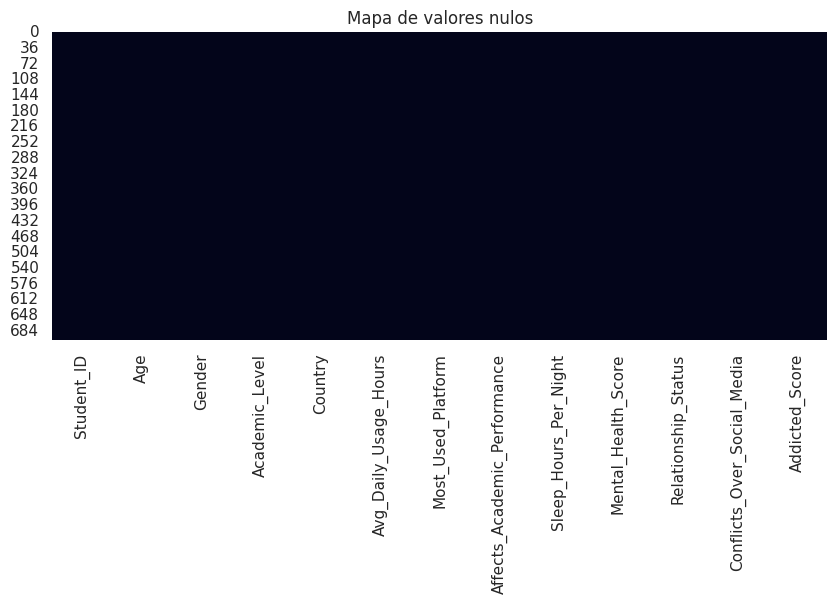

In [ ]:
## Calidad de los datos

# Valores nulos

missing = df.isnull().mean().sort_values(ascending=False) * 100
missing = missing[missing > 0]
missing

plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores nulos")
plt.show()


In [ ]:
# Duplicados

duplicados = df.duplicated().sum()
print("Duplicados:", duplicados)

## Interpretación de negocio
# ¿Qué puede causar los duplicados?

Duplicados: 0


El dataset no presenta valores duplicados ni nulos. Sin embargo, de haberse identificado este tipo de inconsistencias, podrían explicarse por las siguientes razones:

1. Participantes que envían el cuestionario en más de una ocasión.  
2. Campos que no se completan debido a una mala configuración del formulario o porque se trataba de preguntas opcionales.

## ¿Cómo tratar los registros duplicados?

1. Verificar que las filas duplicadas contengan información idéntica. En caso afirmativo, conservar un solo registro y eliminar los demás.  
2. Si existe una marca de tiempo de envío, también se podría priorizar los registros más recientes.

## ¿Cómo tratar los valores nulos?

1. Si el porcentaje de valores nulos en una columna es menor al 1 %, se pueden eliminar las filas que los contengan.  
2. Si una columna presenta un alto porcentaje de valores nulos (por ejemplo, 80 %) y no es relevante para el análisis, se recomienda eliminar la columna completa.


In [ ]:
# Tipos de datos no consistentes

df.dtypes.value_counts()

# Si alguna columna numérica está catalogada como object, validar


,count
object,6
int64,5
float64,2


# Tipos de datos no consistentes
### Haciendo una revisión con las descripciones de las columnas y el conteo de tipos de datos, se concluye que son consistentes, es decir, los valores almacenados concuerdan con el tipo especificado y la descripción de la variable

In [ ]:
## Análisis univariado

# Se analiza cada variable individualmente para identificar:
# - Distribución
# - Valores extremos
# - Categorías dominantes
# - Posibles errores o sesgos

# Para variables numéricas

num_cols = df.select_dtypes(include=np.number).columns

# Estadísticas

df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Student_ID,705.0,353.000000,203.660256,1.0,177.0,353.0,529.0,705.0
Age,705.0,20.659574,1.399217,18.0,19.0,21.0,22.0,24.0
Avg_Daily_Usage_Hours,705.0,4.918723,1.257395,1.5,4.1,4.8,5.8,8.5
Sleep_Hours_Per_Night,705.0,6.868936,1.126848,3.8,6.0,6.9,7.7,9.6
Mental_Health_Score,705.0,6.226950,1.105055,4.0,5.0,6.0,7.0,9.0
Conflicts_Over_Social_Media,705.0,2.849645,0.957968,0.0,2.0,3.0,4.0,5.0
Addicted_Score,705.0,6.436879,1.587165,2.0,5.0,7.0,8.0,9.0


# Análisis univariado para columnas numéricas
Entre observaciones de estos datos podemos ver:
- En la columna "Age" el mínimo es 18 y el máximo es 24, lo que concuerda con la descripción de la muestra en el sitio donde fue publicado el dataset, donde se especifica que la encuesta fue aplicada en jóvenes adultos estudiantes de entre estas edades.
- En la columna "Avg_Daily_Usage_Hours" observamos un promedio de 4.9 horas, que considerando el promedio de "Sleep_Hours_Per_Night", el uso de redes sociales representa casi una tercera parte de las horas activas del día de los encuestados en promedio.
- Hasta el percentil 50 de la columna "Sleep_Hours_Per_Night" es 6.9, es decir, la mitad de la muestra tiene horas de sueño inferiores a la cantidad recomendada por la OMS (7-9 horas) para adultos de 18 años en adelante.

# Relaciones entre Variables del Estudio
¿Cómo interactúan columnas entre sí?

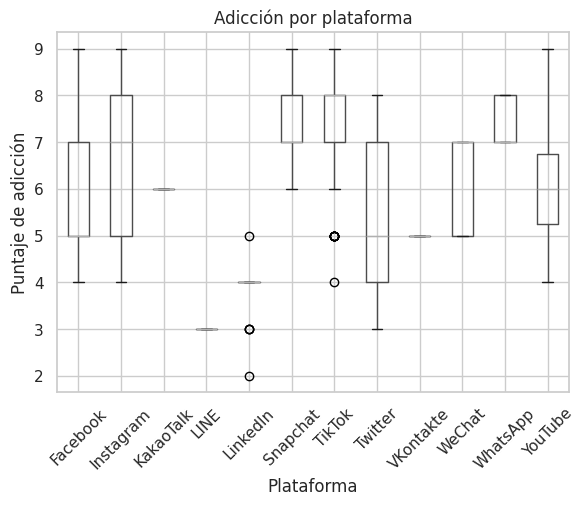

In [ ]:
# Adicción por Plataforma
df.boxplot(column="Addicted_Score", by="Most_Used_Platform")
plt.title("Adicción por plataforma")
plt.suptitle("")
plt.xlabel("Plataforma")
plt.ylabel("Puntaje de adicción")
plt.xticks(rotation=45)
plt.show()

# ¿La plataforma más utilizada influye en el nivel de adicción a las redes sociales?

- Instagram, TikTok, Snapchat y WhatsApp muestran medianas altas (≈7–8), lo que sugiere que los usuarios de estas plataformas tienden a reportar mayor nivel de adicción.

- LINE y KakaoTalk aparecen con puntajes bajos y poca variabilidad, indicando menor adicción promedio en esos usuarios.

- YouTube tiene una mediana intermedia (≈6) pero con dispersión, lo que sugiere perfiles variados de uso.

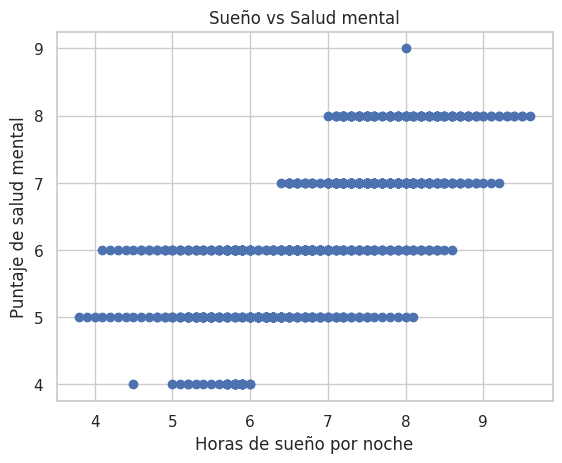

In [ ]:
# Sleep_Hours_Per_Night vs Mental_Health_Score
plt.figure()
plt.scatter(df["Sleep_Hours_Per_Night"], df["Mental_Health_Score"])
plt.title("Sueño vs Salud mental")
plt.xlabel("Horas de sueño por noche")
plt.ylabel("Puntaje de salud mental")
plt.show()


# ¿Dormir más = mejor salud mental?

A partir del diagrama de dispersión entre horas de sueño por noche y puntaje de salud mental, se observa una tendencia positiva moderada: a medida que aumentan las horas de sueño, también tienden a aumentar los puntajes de salud mental.

- Las personas que duermen entre 7 y 9 horas suelen concentrarse en puntajes de salud mental más altos (7–8).

- En cambio, quienes duermen menos de 6 horas aparecen con mayor frecuencia en puntajes más bajos (4–6).

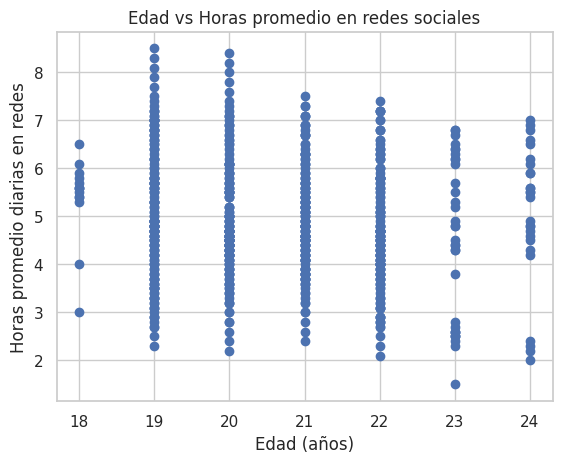

In [ ]:
# Scatter plot: Age vs Avg_Daily_Usage_Hours
plt.figure()
plt.scatter(df["Age"], df["Avg_Daily_Usage_Hours"])
plt.title("Edad vs Horas promedio en redes sociales")
plt.xlabel("Edad (años)")
plt.ylabel("Horas promedio diarias en redes")
plt.show()



# ¿La edad influye en las horas que se pasan en redes sociales?

Al analizar la relación entre Edad y Horas promedio diarias en redes sociales, el diagrama de dispersión muestra una tendencia negativa leve:

- Los participantes de 18 a 20 años concentran muchos valores entre 5 y 7 horas diarias.

- A partir de los 22–24 años, se observa que las horas promedio tienden a ser ligeramente menores, con más puntos entre 3 y 5 horas.

Aunque hay bastante dispersión, la nube de puntos sugiere que, en general, a mayor edad, menor tiempo en redes.

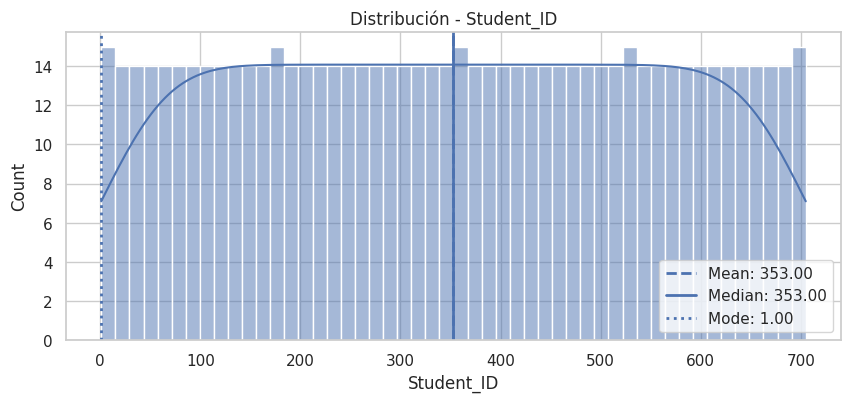

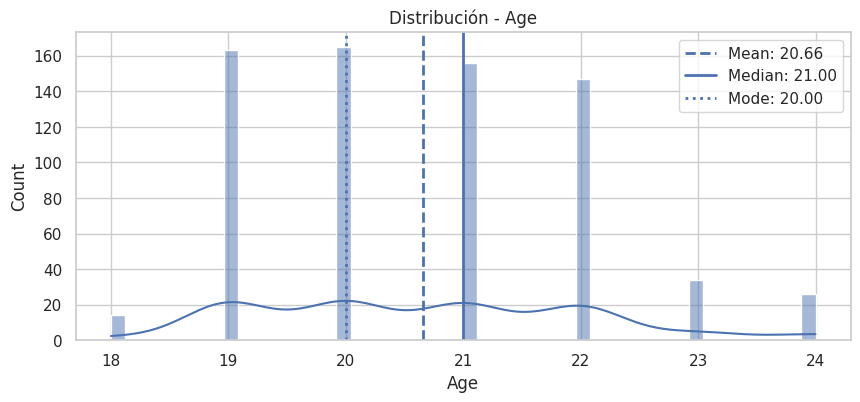

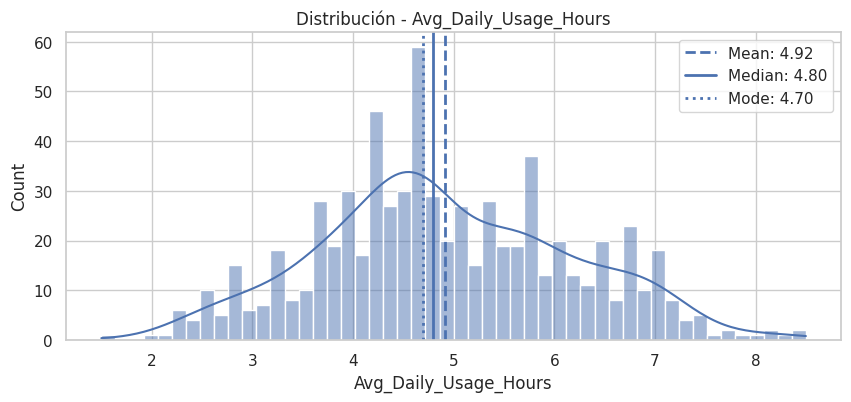

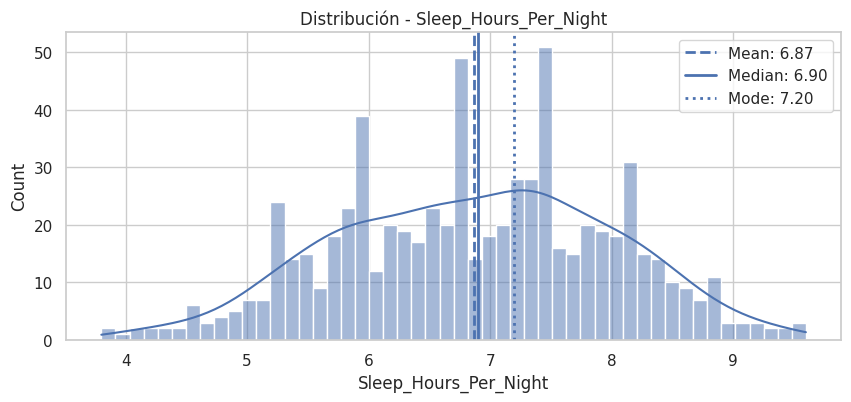

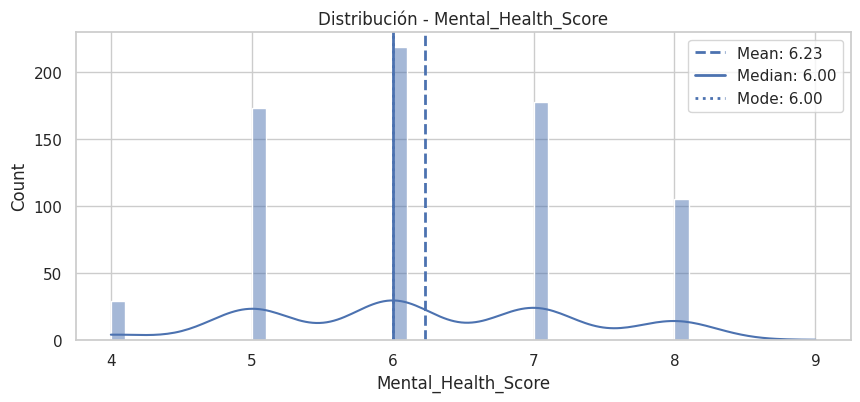

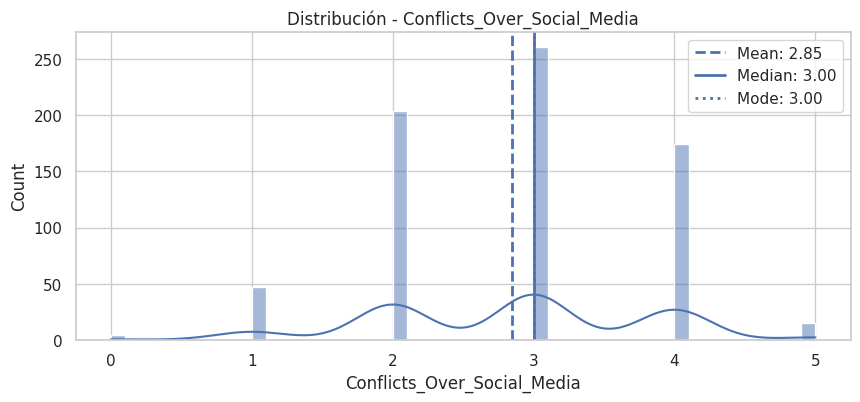

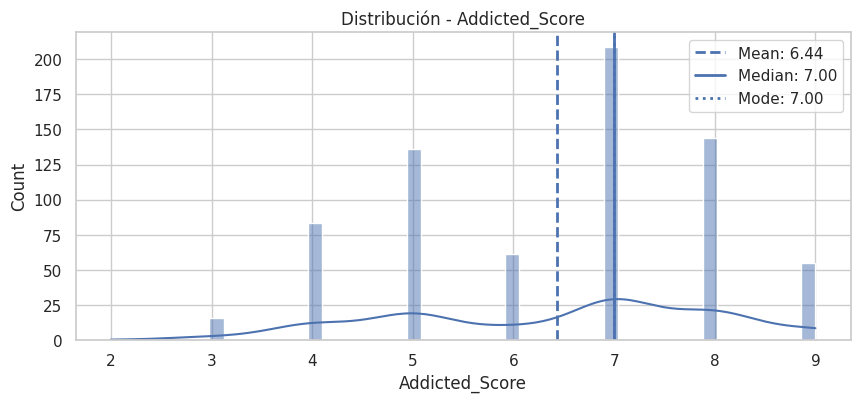

In [ ]:
# Histogramas

from scipy import stats

for col in num_cols:
    data = df[col].dropna()

    plt.figure(figsize=(10,4))
    sns.histplot(data, kde=True, bins=50)

    mean_val = data.mean()
    median_val = data.median()

    # Moda
    mode_val = data.mode()
    mode_val = mode_val.iloc[0] if len(mode_val) > 0 else np.nan

    # Líneas verticales
    plt.axvline(mean_val, linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, linestyle="-", linewidth=2, label=f"Median: {median_val:.2f}")
    plt.axvline(mode_val, linestyle=":", linewidth=2, label=f"Mode: {mode_val:.2f}")

    plt.title(f"Distribución - {col}")
    plt.legend()
    plt.show()


# Análisis histogramas
- "Age": Observamos que la mayoría de la muestra se encuentra entre los 19 y 22 años, con registros más inusuales de 18, 23 y 24 años. Lo que concuerda con que la mayoría de los estudiantes estén en la categoría "Undergraduate".
- "Avg_Daily_Usage_Hours": La mayor frecuencia se encuentra entre las 4 y 5 horas y se evidencia una distribución mayoritariamente equilibrada.
- "Sleep_Hours_per_Night": Vemos ciertos picos que sobresalen, aproximadamente en las 7.5, 6.8 y 5.9 horas, pero fuera de eso es una distribución equilibrada.
- "Mental_Health_Score": La distribución se concentra alrededor del puntaje 6, además, observamos que la frecuencia disminuye considerablemente del score de 5 a 4, hubo muy pocos encuestados que puntuaron menos de 5.
- "Conflicts_Over_Social_Media": Vemos una distribución central alrededor del 3, con un descenso considerable al pasar de 4 a 5.
- "Addicted_Score": La mayor distribución se encuentra en 7, curiosamente, 6 es bastante bajo, lo que causa un ligero sesgo a la izquierda, aunque la segunda categoría con mayor frecuencia sea 8.

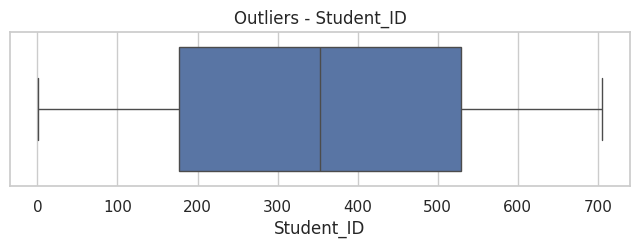

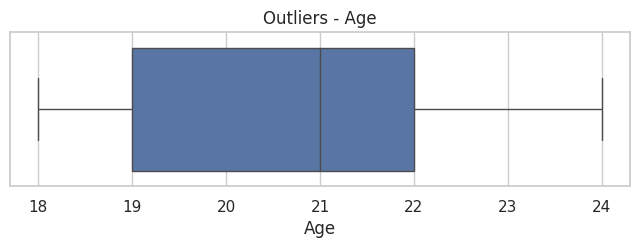

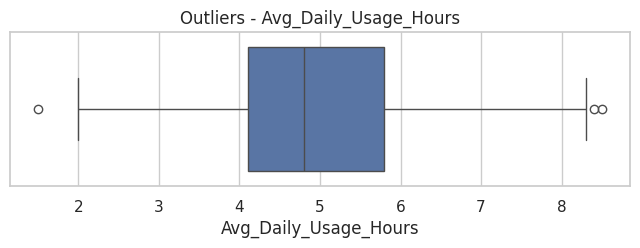

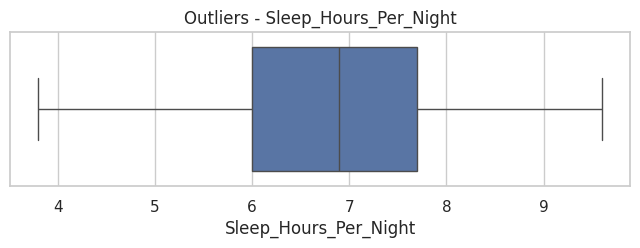

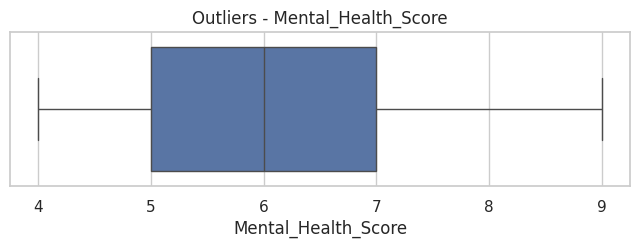

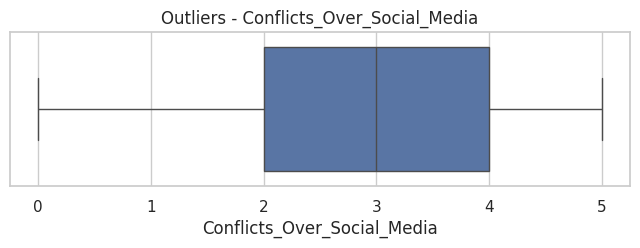

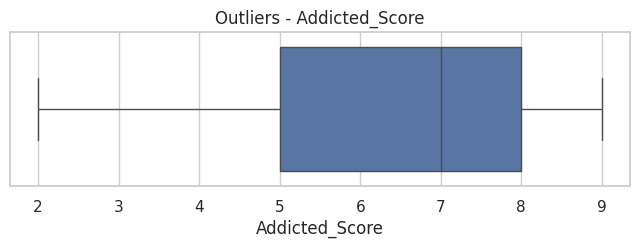

In [ ]:
# Boxplots

for col in num_cols:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers - {col}")
    plt.show()

## Interpretación de negocio
# ¿Variables con alta dispersión?

#Análisis boxplots

- "Age": Observamos una distribución relativamente amplia, por ser una variable de carácter discreto, pero teniendo la mediana en 21.
- "Avg_Daily_Usage_Hours": Al ser una variable numérica continua, presenta una dispersión menor que por ejemplo "Age", observamos que el 50% central de los datos se encuentra entre 4.1 y 5.8 pero a la vez, siendo la única variable que presenta outliers (valores fuera del rango esperado) teniendo un registro menor a 2 y dos registros mayores a 8.
- "Sleep_Hours_Per_Night": El 50% central está bastante concentrado, entre las 6 y las 7.7 horas.
- "Addicted_Score": Aquí la distribución del 50% central es más amplia y desplazada a la derecha (con mediana en 7), con una cantidad considerable de valores esperados a la izquierda.

In [ ]:
# Variables categóricas

cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False).head(10))




Columna: Gender
Gender
Female    353
Male      352
Name: count, dtype: int64

Columna: Academic_Level
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

Columna: Country
Country
India          53
USA            40
Canada         34
France         27
Mexico         27
Spain          27
Turkey         27
Ireland        27
Denmark        27
Switzerland    27
Name: count, dtype: int64

Columna: Most_Used_Platform
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
Name: count, dtype: int64

Columna: Affects_Academic_Performance
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

Columna: Relationship_Status
Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64


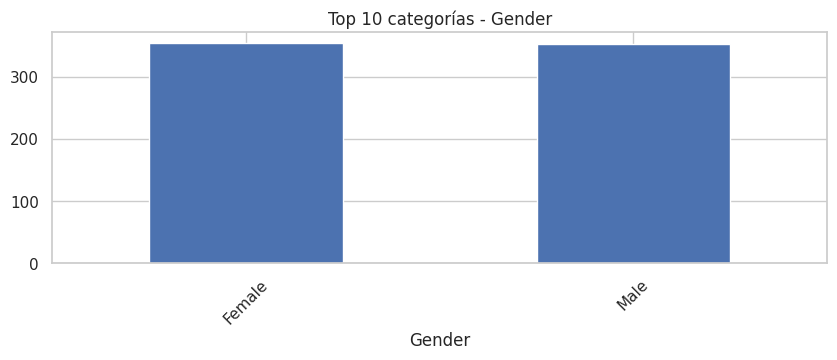

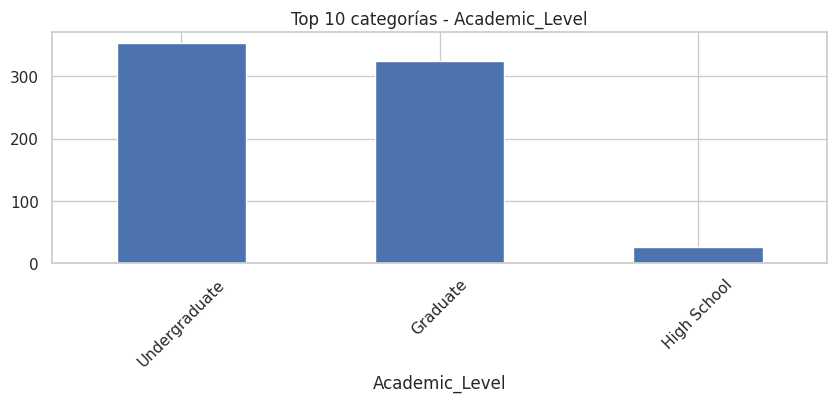

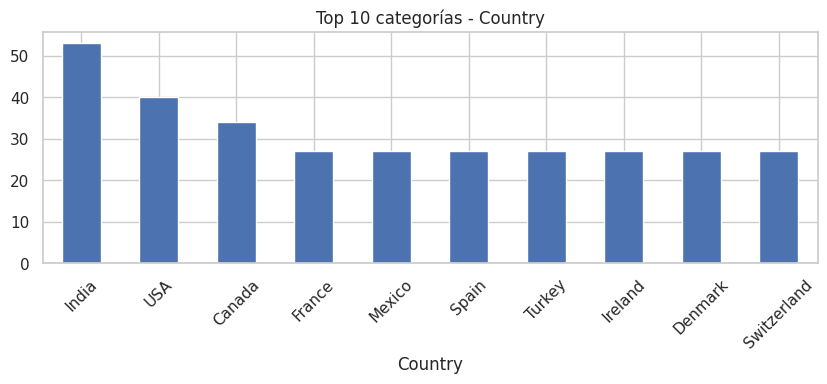

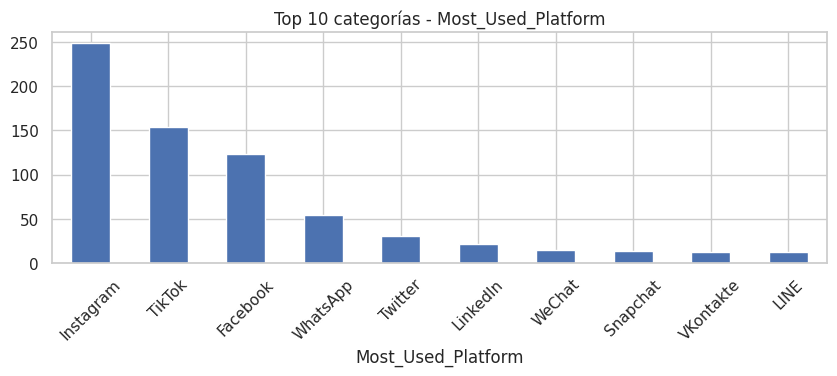

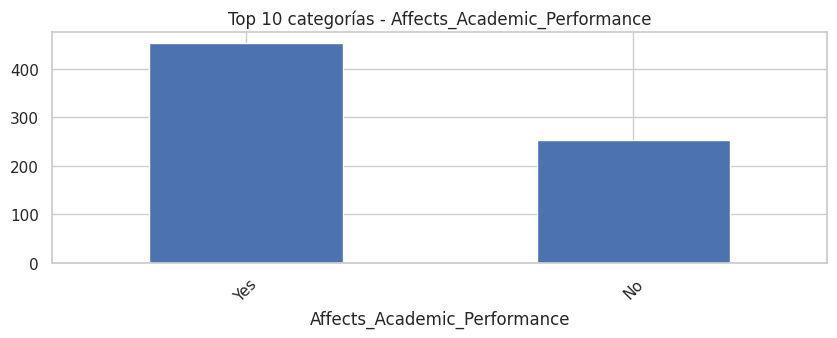

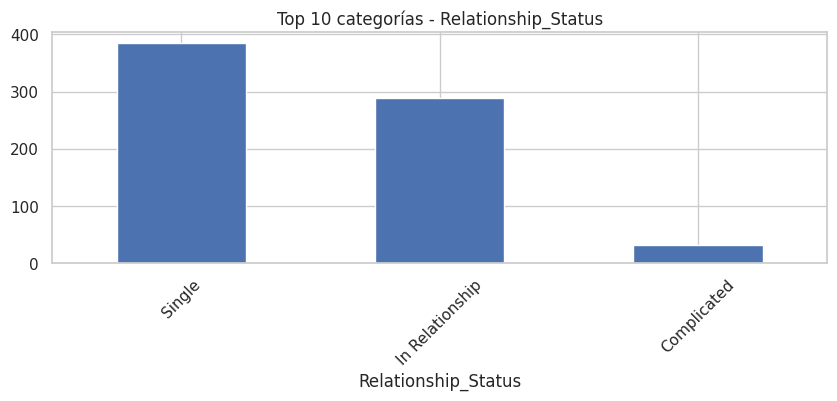

In [ ]:
# Gráficos de barras

for col in cat_cols:
    plt.figure(figsize=(10,3))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top 10 categorías - {col}")
    plt.xticks(rotation=45)
    plt.show()

### Interpretación de negocio
# ¿Categorías dominantes?

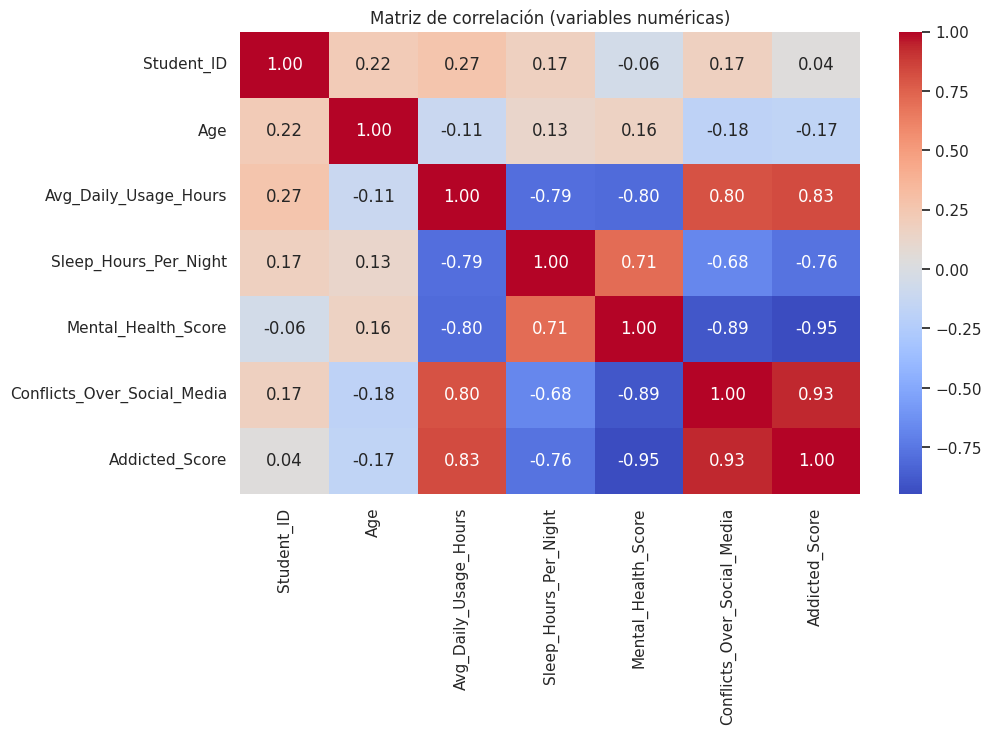

In [ ]:
# Correlación (Numéricas)

corr = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación (variables numéricas)")
plt.show()


# Análisis de correlación entre variables
## Observamos comportamientos interesantes en la manera en la que interactúan ciertas variables:
- En general, la columna edad parece no tener una influencia considerable sobre el comportamiento con respecto al uso de las redes.

- Por otro lado, la columna "Avg_Daily_Usage_Hours" presenta correlación positiva fuerte con Addicted_Score (que es lo lógico) y "Conflicts_over_Social_Media", lo que nos llevaría a concluir que mientras más tiempo pase un individuo interactuando con redes sociales, aumenta la probabilidad de que surjan conflictos de pareja.
Por otro lado, la columna presenta correlación fuerte negativa con "Mental_Health_Score" y "Sleep_Hours_per_Night", que parece indicar que un uso prolongado de redes sociales conlleva una disminución en la cantidad de sueño y la autopercepción de salud mental.

- "Mental_Health_Score": Esta columna tiene el índice de correlación más fuerte, y es con la columna "Addicted_Score", es decir, los encuestados son concientes de que el asignarse un puntaje de adicción alto, conlleva un impacto en su salud mental.

- "Conflicts_over_Social_Media": Tiene una correlación positiva muy fuerte con "Addicted_Score", es decir que el percibirse con un nivel alto de adicción tiene una relación directamente proporcional con la cantidad de conflictos surgidos.

- "Sleep_Hours_per_Night": Esta columna se puede interpretar como un resultado causado por otras que inciden directamente, por ejemplo, hay una correlación negativa con "Conflicts_over_Social_Media" (posiblemente sugiriendo que los conflictos surgidos en redes sociales dificultan conciliar el sueño).
Por otro lado, tiene una correlación positiva con "Mental_Health_Score", lo que indica que el tener una mayor cantidad de horas de sueño incide positivamente en la salud mental autopercibida.

Numéricas: ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
Categóricas: ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']


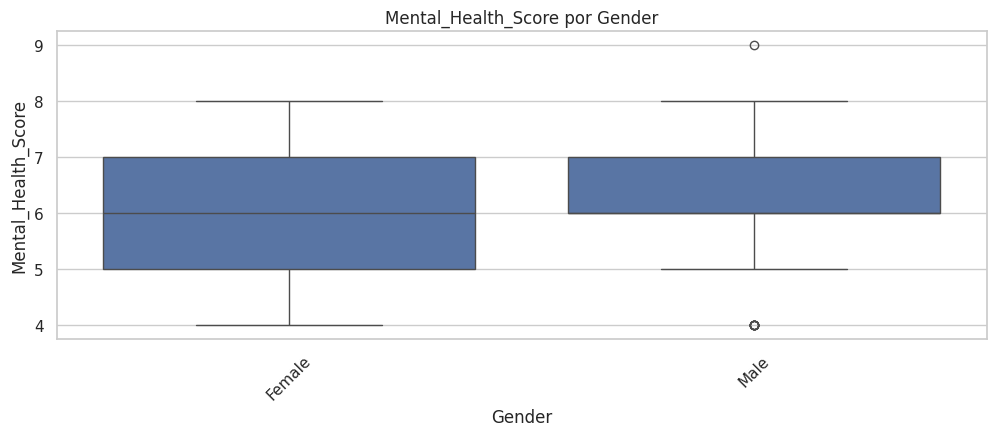

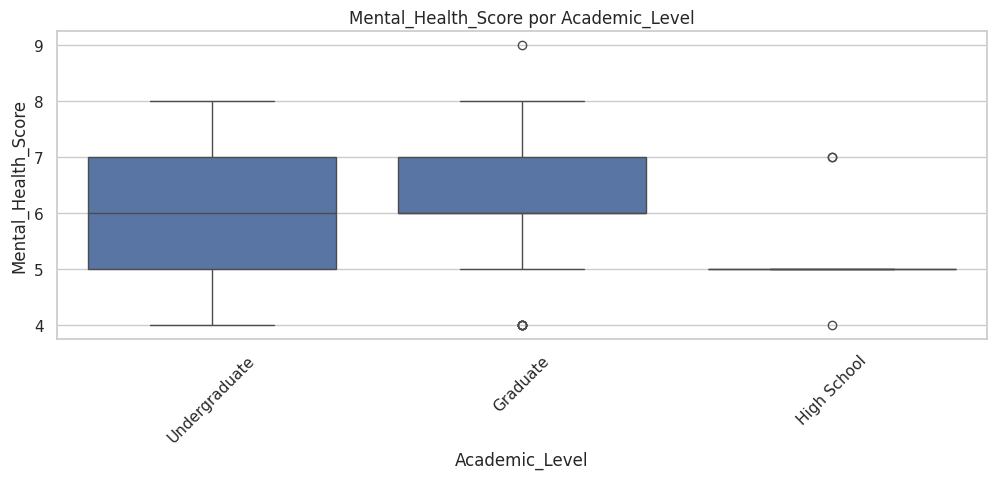

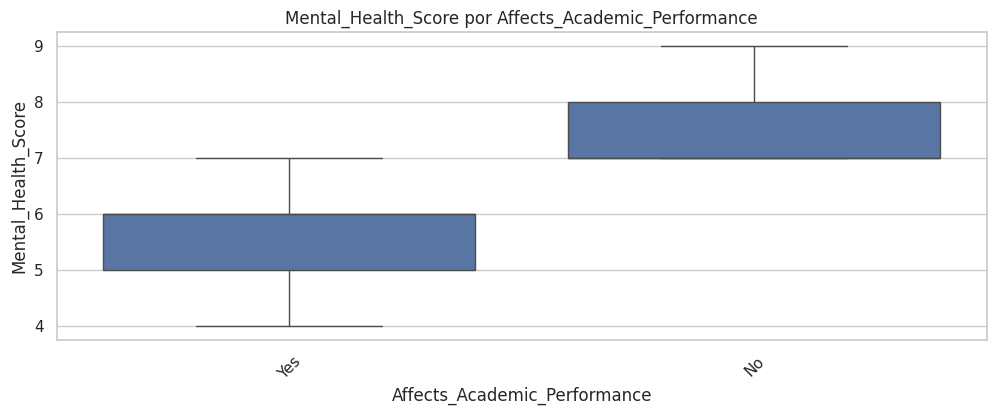

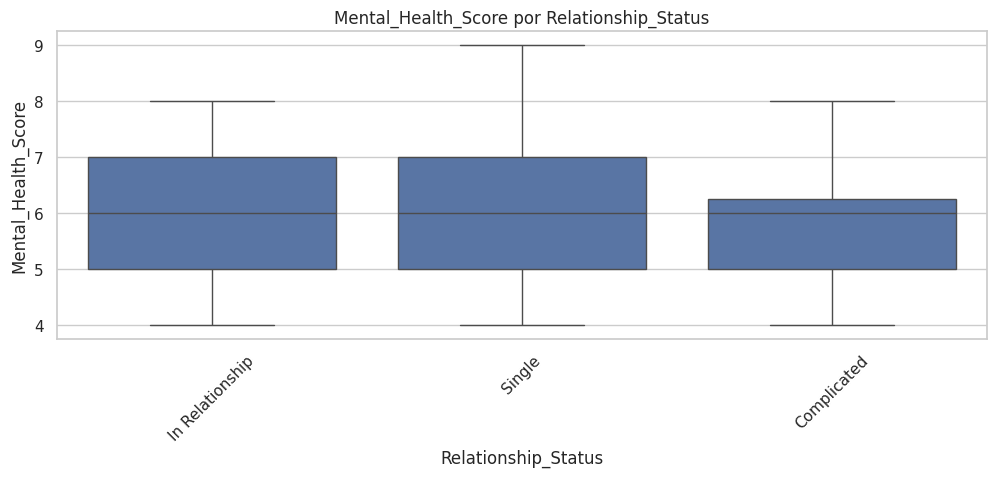

In [ ]:
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

print("Numéricas:", list(num_cols))
print("Categóricas:", list(cat_cols))

col_cat = cat_cols[0]
col_num = num_cols[0]

num_col = "Mental_Health_Score"

cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

for cat in cat_cols:
    # evitar categóricas con demasiados valores únicos (gráfico ilegible)
    if df[cat].nunique() <= 10:
        plt.figure(figsize=(12,4))
        sns.boxplot(data=df, x=cat, y=num_col)
        plt.title(f"{num_col} por {cat}")
        plt.xticks(rotation=45)
        plt.show()





## Conclusiones Finales del Análisis Exploratorio de Datos

Este EDA ha permitido una comprensión profunda del dataset 'Students Social Media Addiction', revelando patrones y relaciones clave en el uso de redes sociales por parte de los estudiantes y su impacto en diversos aspectos de su vida. A continuación, se resumen las conclusiones más relevantes:

### 1. Calidad y Estructura del Dataset
- **Datos Completos y Consistentes:** El dataset presenta una excelente calidad, sin valores nulos ni duplicados, y con tipos de datos consistentes con la descripción de cada variable. Esto asegura la fiabilidad de los análisis realizados.
- **Población Joven y Específica:** La muestra se concentra en estudiantes de 18 a 24 años, predominantemente en nivel universitario (Undergraduate y Graduate), lo cual permite focalizar las interpretaciones en este segmento demográfico.

### 2. Patrones Generales de Uso de Redes Sociales
- **Alta Penetración y Uso:** Instagram es la plataforma más utilizada, seguida de TikTok y Facebook. Más de la mitad de los encuestados reporta que el uso de redes sociales afecta su rendimiento académico, y el puntaje promedio de adicción es de 6.4 sobre 10, indicando una preocupación generalizada.
- **Tiempo Significativo de Uso:** El promedio de casi 5 horas diarias en redes sociales consume una parte considerable del tiempo activo de los estudiantes, evidenciando la magnitud del engagement con estas plataformas.
En general, a mayor edad, menor tiempo en redes.

### 3. Impacto en el Bienestar y Rendimiento
- **Correlación Directa entre Uso, Adicción y Conflictos:** Existe una correlación positiva fuerte entre las `Avg_Daily_Usage_Hours`, `Addicted_Score` y `Conflicts_Over_Social_Media`. Un mayor tiempo de uso se asocia con mayores niveles de adicción percibida y más conflictos derivados del uso de redes.
- **Uso de Redes y Salud Mental/Sueño:** Se observa una correlación negativa fuerte entre `Avg_Daily_Usage_Hours` y `Mental_Health_Score`, así como con `Sleep_Hours_Per_Night`. Esto sugiere que un uso prolongado de
redes sociales se vincula con una percepción de menor salud mental y menos horas de sueño, aunque la relación no es perfecta ni determinista. Es decir, el sueño parece ser un factor importante, pero no el único que influye en la salud mental.
- **Conciencia del Impacto en Salud Mental:** La correlación negativa muy fuerte entre `Mental_Health_Score` y `Addicted_Score` (-0.89) indica que los estudiantes que se perciben más adictos a las redes sociales también reportan una peor salud mental. Esto sugiere una conciencia del impacto negativo.

### 4. Diferencias por Categorías (Análisis Bivariado con Mental_Health_Score)
- **Género:** No se encuentran diferencias significativas en el `Mental_Health_Score` entre géneros, lo que sugiere una percepción similar de la salud mental en esta muestra.
- **Nivel Académico:** Los estudiantes de `High School` tienden a reportar un `Mental_Health_Score` ligeramente más bajo que los de `Undergraduate` y `Graduate`. Esto podría reflejar diferentes presiones o etapas de desarrollo.
- **Impacto Académico Percibido:** Los estudiantes que afirman que las redes sociales `Yes` afectan su rendimiento académico tienen un `Mental_Health_Score` promedio considerablemente más bajo. Esta es una de las relaciones más claras observadas, indicando que la percepción de afectación académica se asocia directamente con una peor salud mental.
- **Estado de Relación:** El estado de relación `Complicated` se asocia con el `Mental_Health_Score` más bajo y mayor dispersión, sugiriendo que este tipo de relaciones puede ser un factor de estrés relevante para la salud mental.

### 5. Horas de Sueño y Salud Mental
- **Relación Positiva:** La `Sleep_Hours_Per_Night` y el `Mental_Health_Score` muestran una correlación positiva, lo que indica que una mayor cantidad de horas de sueño se asocia con una mejor salud mental autopercibida. Esto subraya la importancia del sueño como factor protector del bienestar.

### 6. Consideraciones para Intervención
- Los hallazgos sugieren que las intervenciones para mejorar la salud mental de los estudiantes podrían centrarse en la gestión del tiempo de uso de redes sociales, especialmente en plataformas como Instagram y TikTok, y en programas de bienestar que promuevan hábitos de sueño saludables, particularmente en estudiantes de `High School` y aquellos con relaciones `Complicated`.